# Linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get the training data

In [5]:
dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')
x=dfx.values
y=dfy.values
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


## Visualise and Preprocess

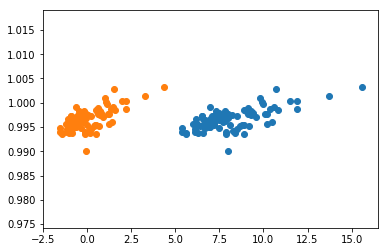

In [10]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)

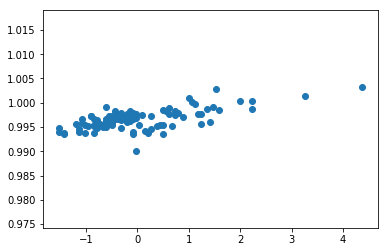

In [11]:
plt.scatter(X,Y)
plt.show()

## Gradient Alogorithm
- Start with a random theta
- Repeat until converge
    - Update Theta according to the rule

In [98]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
    
    return error

def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
    return grad
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    theta=np.zeros((2,))
    itr=0
    max_itr=100
    error_list=[]
    x=0
    e=1
    while(abs(x-e)>=0.0000001):
        grad=gradient(X,Y,theta)
        x=e
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,error_list

In [99]:
final_theta,error_list=gradientDescent(X,Y)

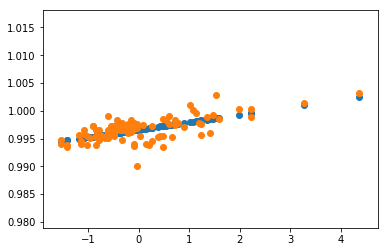

In [100]:
plt.scatter(X,hypothesis(X,final_theta))
plt.scatter(X,Y)

[0.00023444]
94


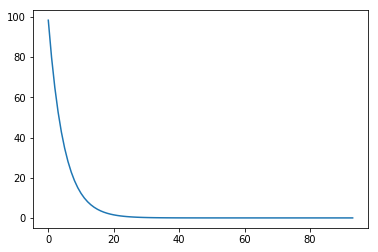

In [101]:
plt.plot(error_list)
print(min(error_list))
print(len(error_list))
plt.show()

In [102]:
print(final_theta)

[0.99657885 0.00135786]


In [103]:
### Plot the line for testing data
xtest=np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


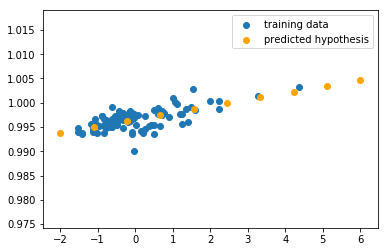

In [104]:
plt.scatter(X,Y,label='training data')
plt.scatter(xtest,hypothesis(xtest,final_theta),color='orange',label='predicted hypothesis')
plt.legend()
plt.show()